In [201]:
import bs4
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [34]:
#зпарсимо назву колонок
respone = requests.get('https://archive.ics.uci.edu/dataset/42/glass+identification')
soup = BeautifulSoup(respone.text, 'lxml').find('table')
table = pd.read_html(str(soup))[0]
columns = table['Variable Name'].tolist()
columns.append('Type_of_glass')
columns

['Id_number',
 'RI',
 'Na',
 'Mg',
 'Al',
 'Si',
 'K',
 'Ca',
 'Ba',
 'Fe',
 'Type_of_glass']

In [35]:
df = pd.read_csv('C:/Users/lemes/OneDrive/Рабочий стол/dz/glass.data',names=columns)
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [37]:
df.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


подивитися на K максимальне значення
подивитися на Ba максимальне значення
подивитися на Fe максимальне значення

In [38]:
# подивимось скільки у нас таргету
df.groupby('Type_of_glass').count()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type_of_glass,,,,,,,,,,
1,70,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29,29


<Axes: >

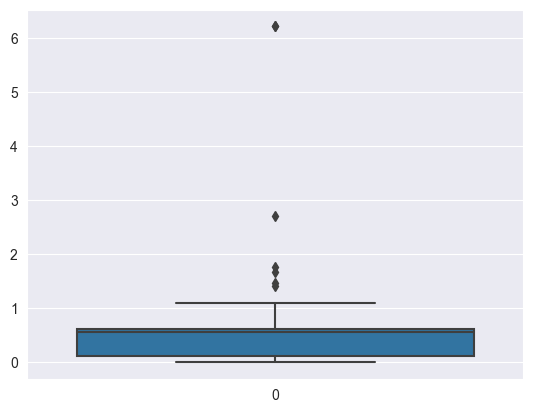

In [39]:
sns.boxplot(df['K'])

In [40]:
df.sort_values('K', ascending=False)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
172,173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
171,172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
201,202,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7
185,186,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
163,164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...
190,191,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
191,192,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
193,194,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
194,195,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7


In [41]:
df.query('Type_of_glass == 5').sort_values('K', ascending=False)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
171,172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
172,173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
163,164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
168,169,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,5
174,175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5
164,165,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00,5
166,167,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5
165,166,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00,5
169,170,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.00,0.00,5
167,168,1.51969,12.64,0.00,1.65,73.75,0.38,11.53,0.00,0.00,5


In [42]:
# оскільки в описі нашого датасету сказано що K - це відсоток в оксиді (він не може бути більше 1) - та бачимо, що в середньому по цій группі показник 0.7-0.8 (можемо припустити - що це помилка), але дивлячись на ситуацію, скоріш за все, все що менше 1 треба помножити на 10 ( щоб отримати відсоток )

In [43]:
df["K"] = df["K"].apply(lambda x: x * 10 if x < 1 else x)

In [44]:
# зробимо колонку sum елементів щоб дивитися чи не вийшли ми за межі

In [45]:
df['sum_per'] = df['Na'] + df['Mg'] + df['Al'] + df['Si'] + df['K'] + df['Ca'] + df['Ba'] + df['Fe']

In [46]:
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,sum_per
0,1,1.52101,13.64,4.49,1.10,71.78,0.6,8.75,0.00,0.0,1,100.36
1,2,1.51761,13.89,3.60,1.36,72.73,4.8,7.83,0.00,0.0,1,104.21
2,3,1.51618,13.53,3.55,1.54,72.99,3.9,7.78,0.00,0.0,1,103.29
3,4,1.51766,13.21,3.69,1.29,72.61,5.7,8.22,0.00,0.0,1,104.72
4,5,1.51742,13.27,3.62,1.24,73.08,5.5,8.07,0.00,0.0,1,104.78
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.8,9.18,1.06,0.0,7,100.67
210,211,1.51685,14.92,0.00,1.99,73.06,0.0,8.40,1.59,0.0,7,99.96
211,212,1.52065,14.36,0.00,2.02,73.42,0.0,8.44,1.64,0.0,7,99.88
212,213,1.51651,14.38,0.00,1.94,73.61,0.0,8.48,1.57,0.0,7,99.98


<Axes: >

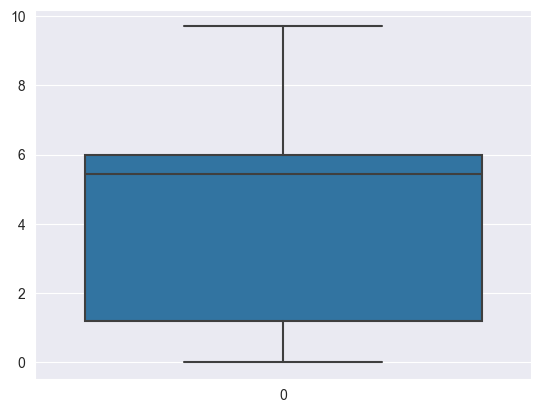

In [47]:
sns.boxplot(df['K'])

<Axes: >

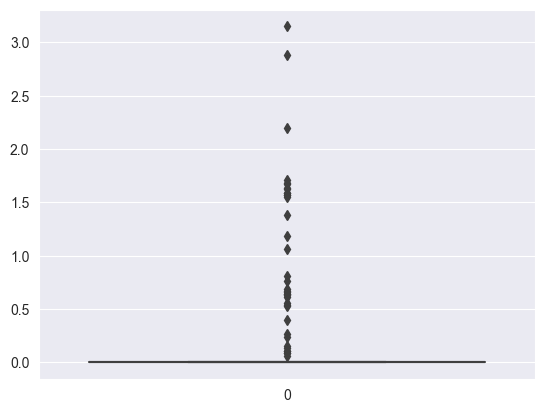

In [48]:
sns.boxplot(df['Ba'])

In [49]:
# подивимось на всі Ba, ті що менше 1 (барія в стеклі зазвичай менше 2х відсотків якщо він приміняється тому помножимо все що менше 1 на 10
df.query('Ba < 1')

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,sum_per
0,1,1.52101,13.64,4.49,1.10,71.78,0.6,8.75,0.00,0.0,1,100.36
1,2,1.51761,13.89,3.60,1.36,72.73,4.8,7.83,0.00,0.0,1,104.21
2,3,1.51618,13.53,3.55,1.54,72.99,3.9,7.78,0.00,0.0,1,103.29
3,4,1.51766,13.21,3.69,1.29,72.61,5.7,8.22,0.00,0.0,1,104.72
4,5,1.51742,13.27,3.62,1.24,73.08,5.5,8.07,0.00,0.0,1,104.78
...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,1.51508,15.15,0.00,2.25,73.50,0.0,8.34,0.63,0.0,7,99.87
201,202,1.51653,11.95,0.00,1.19,75.18,2.7,8.93,0.00,0.0,7,99.95
202,203,1.51514,14.85,0.00,2.42,73.72,0.0,8.39,0.56,0.0,7,99.94
204,205,1.51617,14.95,0.00,2.27,73.30,0.0,8.71,0.67,0.0,7,99.90


In [50]:
df["Ba"] = df["Ba"].apply(lambda x: x * 10 if x < 1 else x)

<Axes: >

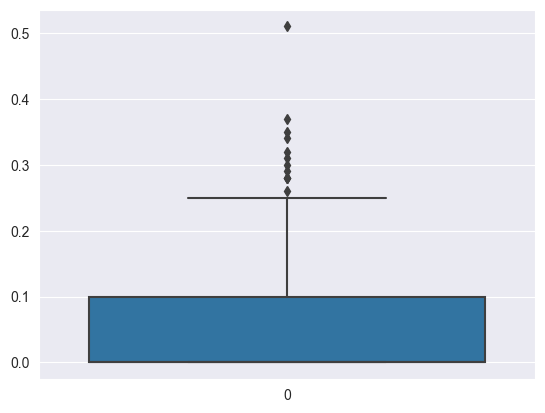

In [51]:
sns.boxplot(df['Fe']) # ферум з опису скла не викликає зауважень

In [52]:
df['sum_per'] = df['Na'] + df['Mg'] + df['Al'] + df['Si'] + df['K'] + df['Ca'] + df['Ba'] + df['Fe']

In [53]:
# Подивимось рядки які в нас в відсотковій частині вишйли більше 100 відсотків
df.query("sum_per > 100 and Ba > 4") # припустимо що тут занчення Ba ми зависили у 10 разів

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,sum_per
61,62,1.51977,13.81,3.58,1.32,71.72,1.2,8.67,6.9,0.00,1,107.20
190,191,1.51613,13.88,1.78,1.79,73.10,0.0,8.67,7.6,0.00,7,106.82
191,192,1.51602,14.85,0.00,2.38,73.28,0.0,8.76,6.4,0.09,7,105.76
195,196,1.51545,14.14,0.00,2.68,73.39,0.8,9.07,6.1,0.05,7,106.23
196,197,1.51556,13.87,0.00,2.54,73.23,1.4,9.41,8.1,0.01,7,108.56
197,198,1.51727,14.70,0.00,2.34,73.28,0.0,8.95,6.6,0.00,7,105.87
198,199,1.51531,14.38,0.00,2.66,73.10,0.4,9.08,6.4,0.00,7,106.02
199,200,1.51609,15.01,0.00,2.51,73.05,0.5,8.83,5.3,0.00,7,105.20
200,201,1.51508,15.15,0.00,2.25,73.50,0.0,8.34,6.3,0.00,7,105.54
202,203,1.51514,14.85,0.00,2.42,73.72,0.0,8.39,5.6,0.00,7,104.98


In [54]:
df["Ba"] = df.apply(lambda row: row["Ba"] * 0.1 if row["sum_per"] > 100 and row["Ba"] > 4 else row["Ba"], axis=1)

In [55]:
df['sum_per'] = df['Na'] + df['Mg'] + df['Al'] + df['Si'] + df['K'] + df['Ca'] + df['Ba'] + df['Fe']

In [56]:
df.query("sum_per > 100")

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,sum_per
0,1,1.52101,13.64,4.49,1.10,71.78,0.6,8.75,0.00,0.00,1,100.36
1,2,1.51761,13.89,3.60,1.36,72.73,4.8,7.83,0.00,0.00,1,104.21
2,3,1.51618,13.53,3.55,1.54,72.99,3.9,7.78,0.00,0.00,1,103.29
3,4,1.51766,13.21,3.69,1.29,72.61,5.7,8.22,0.00,0.00,1,104.72
4,5,1.51742,13.27,3.62,1.24,73.08,5.5,8.07,0.00,0.00,1,104.78
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1.51545,14.14,0.00,2.68,73.39,0.8,9.07,0.61,0.05,7,100.74
196,197,1.51556,13.87,0.00,2.54,73.23,1.4,9.41,0.81,0.01,7,101.27
198,199,1.51531,14.38,0.00,2.66,73.10,0.4,9.08,0.64,0.00,7,100.26
199,200,1.51609,15.01,0.00,2.51,73.05,0.5,8.83,0.53,0.00,7,100.43


In [57]:
df['K'] = df.apply(lambda row: row['K'] * 0.1 if row['sum_per'] > 100 else row['K'], axis=1)

In [58]:
df['sum_per'] = df['Na'] + df['Mg'] + df['Al'] + df['Si'] + df['K'] + df['Ca'] + df['Ba'] + df['Fe']

In [59]:
df.query("sum_per > 100")

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,sum_per
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1,100.03
19,20,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1,100.03
30,31,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14,1,100.03
32,33,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.90,0.22,1,100.82
33,34,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.00,0.06,1,100.02
36,37,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,1.10,0.00,1,100.94
46,47,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1,100.02
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,100.01
51,52,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11,1,100.02
55,56,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,1,100.01


In [60]:
# далі дивимось, що максимальне значення Fe - 0.1, проробимо туж саму діяльність з Fe
df['Fe'] = df.apply(lambda row: row['Fe'] * 0.1 if row['sum_per'] > 100 else row['Fe'], axis=1)

In [61]:
df['sum_per'] = df['Na'] + df['Mg'] + df['Al'] + df['Si'] + df['K'] + df['Ca'] + df['Ba'] + df['Fe']

In [62]:
df.query("sum_per > 100 and Type_of_glass != 3") # там може примінятися скло зі складома Ba

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,sum_per
32,33,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.90,0.022,1,100.622
36,37,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,1.10,0.000,1,100.940
99,100,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,1.40,0.000,2,101.060
100,101,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,1.10,0.022,2,100.792
128,129,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,2.70,0.017,2,102.307
141,142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.90,0.017,2,100.627
142,143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.60,0.025,2,100.345
174,175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,2.40,0.051,5,101.721
192,193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,4.00,0.009,7,103.539
196,197,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.001,7,100.001


In [63]:
df["Ba"] = df.apply(lambda row: row["Ba"] * 0.1 if row["sum_per"] > 100 and row["Type_of_glass"] != 3 else row["Ba"], axis=1)

In [64]:
df['sum_per'] = df['Na'] + df['Mg'] + df['Al'] + df['Si'] + df['K'] + df['Ca'] + df['Ba'] + df['Fe']

In [65]:
df.query("sum_per > 100")

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass,sum_per
151,152,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.0,0.000,3,100.040
161,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,1.5,0.024,3,101.154


In [66]:
df.drop('sum_per', axis=1, inplace=True)
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [67]:
df.drop('Id_number', axis=1, inplace=True)

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


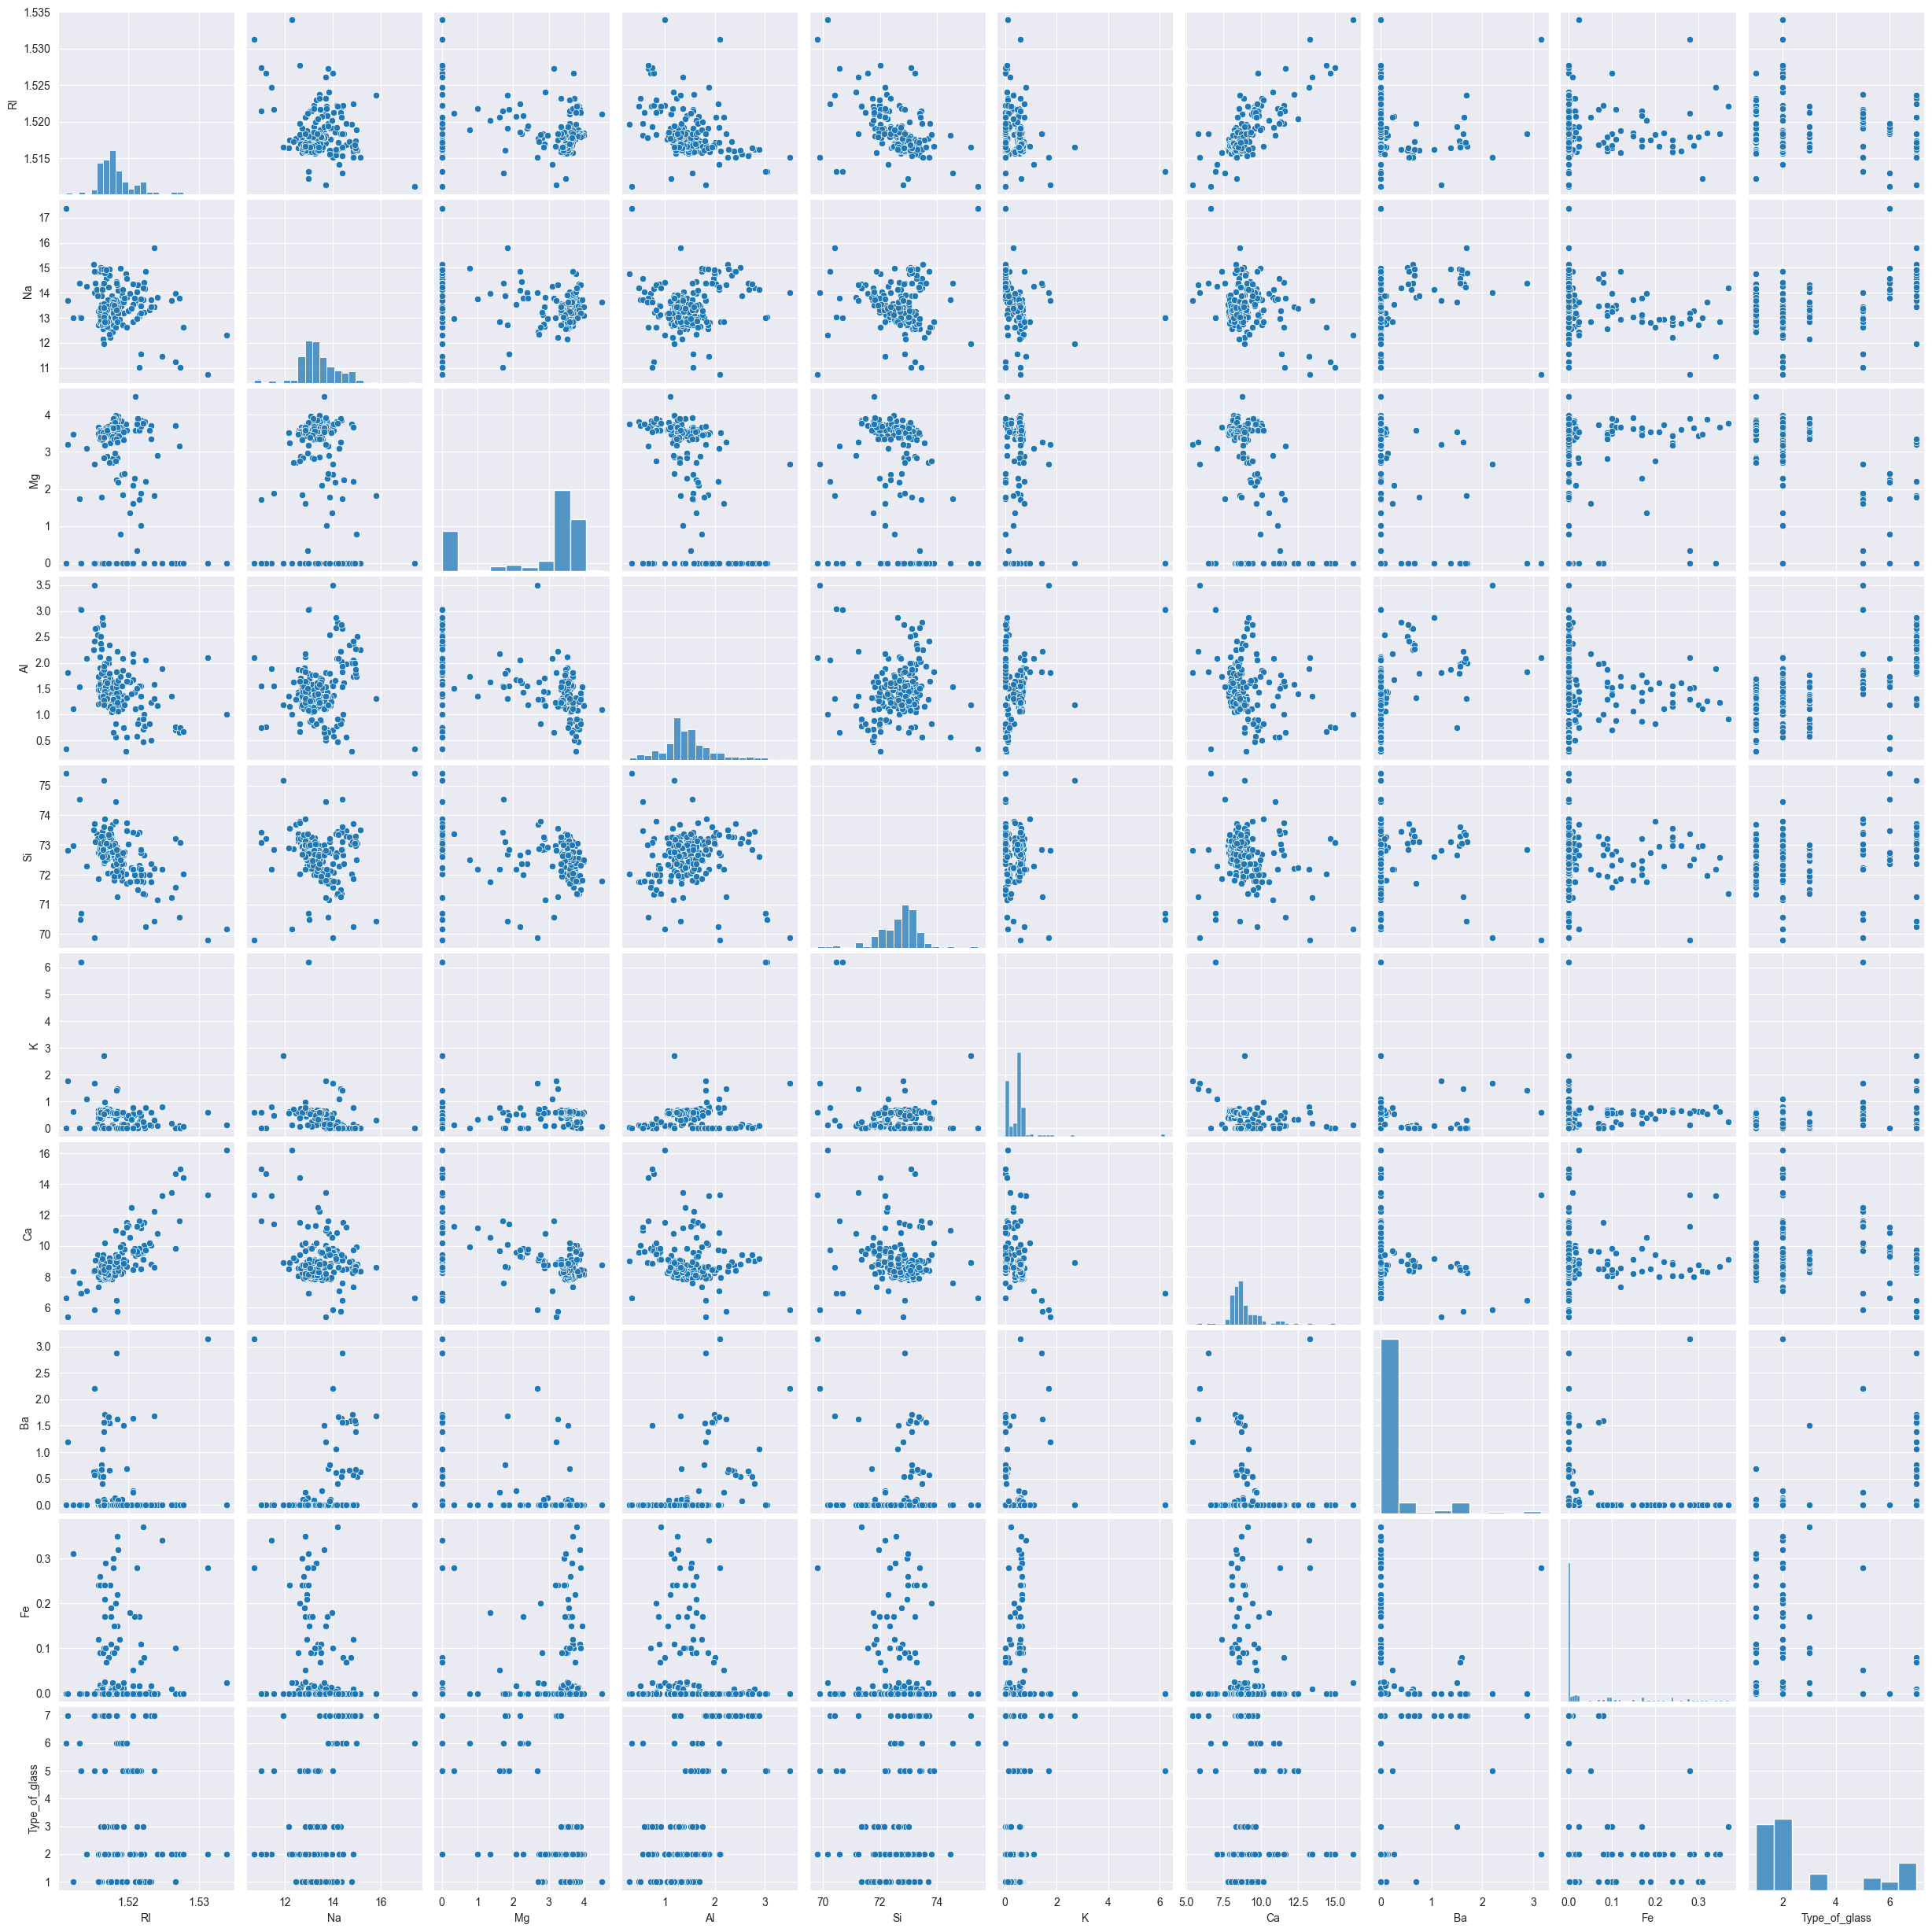

In [68]:
sns.pairplot(df)

Ri - Ca

<Axes: xlabel='RI', ylabel='Ca'>

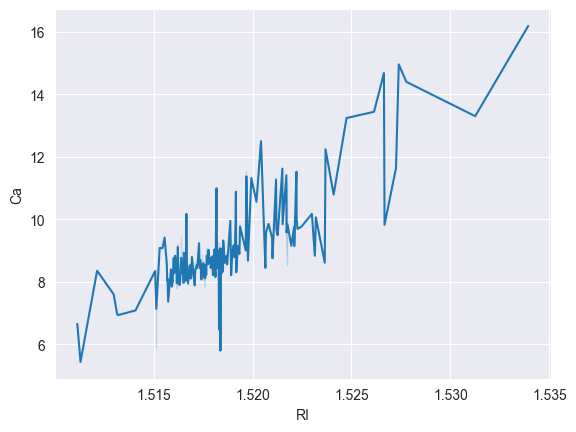

In [69]:
sns.lineplot(x=df['RI'], y=df['Ca'])

In [70]:
df['RI'].corr(df['Ca'])

0.8104026963400852

In [76]:
# Зробимо наш не маштабуючий датасет
disbalance_df = df.copy()
# ми бачили певну кореляцію у фічах RI та Ca - дропнемо Ca та RI замість них - візьмемо середє значення
scaller = StandardScaler(with_mean=False)
scaller = scaller.fit([disbalance_df['RI'], disbalance_df['Ca']])
disbalance_df['RIandCa'] = scaller.mean_
disbalance_df.drop('Ca', axis=1, inplace=True)
disbalance_df.drop('RI', axis=1, inplace=True)

In [77]:
# поділимо датасет на частини
traindis_df , testidis_df = train_test_split(disbalance_df, test_size=0.6,  stratify=disbalance_df['Type_of_glass'])
testdis_df, validdis_df = train_test_split(testidis_df, test_size=0.5, stratify=testidis_df['Type_of_glass'])

In [78]:
# робимо таргети
traindis_target = traindis_df['Type_of_glass']
traindis_df.drop('Type_of_glass', axis=1, inplace=True)
testdis_target = testdis_df['Type_of_glass']
testdis_df.drop('Type_of_glass', axis=1, inplace=True)
validdis_target = validdis_df['Type_of_glass']
validdis_df.drop('Type_of_glass', axis=1, inplace=True)

In [79]:
#зробимо функцію для нашої моделі
def model(text, model, train_df, target_train, test_df, target_test, neibor=5, metrics='euclidean', penalt='l2', solv='lbfgs', weight=None):
    msg = f'Відпацьовуємо на моделі {str(model)}, з даними {text}'
    if model == NearestCentroid:
        model = model(metric=metrics)
    elif model == LogisticRegression:
        model = model(penalty=penalt, solver=solv, class_weight=weight)
    else:
        model = model(neibor)
    model = model.fit(train_df, target_train)
    predict1 = model.predict(train_df)
    predict1 = np.round(predict1)
    accuracy = accuracy_score(target_train, predict1)
    precision = precision_score(target_train, predict1, average='macro')
    recall = recall_score(target_train, predict1, average='macro')
    f1 = f1_score(target_train, predict1, average='macro')    
    msg += f'\n\nна навчальній виборці маємо такі показники:\naccuracy - {accuracy}\nprecision - {precision}\nrecall - {recall}\nf1 - {f1}'
    predict2 = model.predict(test_df)
    predict2 = np.round(predict2)
    accuracy = accuracy_score(target_test, predict2)
    precision = precision_score(target_test, predict2, average='macro')
    recall = recall_score(target_test, predict2, average='macro')
    f1 = f1_score(target_test, predict2, average='macro')  
    msg += f'\n\nна тестовій виборці маємо такі показники:\naccuracy - {accuracy}\nprecision - {precision}\nrecall - {recall}\nf1 - {f1}'
    return msg, predict1, predict2    

In [80]:
msg1, predict_train, predict_test = model(text='немаштабованні данні', model=KNeighborsClassifier, train_df=traindis_df, target_train=traindis_target, test_df=testdis_df, target_test=testdis_target, neibor=3)
msg2, predict_train2, predict_test2 = model(text='немаштабованні данні', model=KNeighborsRegressor, train_df=traindis_df, target_train=traindis_target.values, test_df=testdis_df, target_test=testdis_target.values, neibor=2)
msg3, predict_train3, predict_test3 = model(text='немаштабованні данні', model=NearestCentroid, train_df=traindis_df, target_train=traindis_target, test_df=testdis_df, target_test=testdis_target, metrics='manhattan')
msg4, predict_train4, predict_test4 = model(text='немаштабованні данні', model=LogisticRegression, train_df=traindis_df, target_train=traindis_target, test_df=testdis_df, target_test=testdis_target, penalt='l1', solv='liblinear')

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is

In [81]:
print(msg1)

Відпацьовуємо на моделі <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, з даними немаштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.8352941176470589
precision - 0.8128472222222222
recall - 0.7657287157287157
f1 - 0.7814814814814816

на тестовій виборці маємо такі показники:
accuracy - 0.703125
precision - 0.586489898989899
recall - 0.5841097308488613
f1 - 0.57544944746825


In [82]:
print(msg2)

Відпацьовуємо на моделі <class 'sklearn.neighbors._regression.KNeighborsRegressor'>, з даними немаштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.8235294117647058
precision - 0.7581081081081081
recall - 0.6502164502164502
f1 - 0.6839688114051592

на тестовій виборці маємо такі показники:
accuracy - 0.59375
precision - 0.4795918367346939
recall - 0.4610322389825495
f1 - 0.45728994300422876


In [83]:
print(msg3)

Відпацьовуємо на моделі <class 'sklearn.neighbors._nearest_centroid.NearestCentroid'>, з даними немаштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.7411764705882353
precision - 0.730898890381649
recall - 0.8193001443001444
f1 - 0.7545434098065678

на тестовій виборці маємо такі показники:
accuracy - 0.609375
precision - 0.5578703703703703
recall - 0.5914251207729468
f1 - 0.5514175526370648


In [84]:
print(msg4)

Відпацьовуємо на моделі <class 'sklearn.linear_model._logistic.LogisticRegression'>, з даними немаштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.6235294117647059
precision - 0.4675841903609599
recall - 0.536038961038961
f1 - 0.4987990688959864

на тестовій виборці маємо такі показники:
accuracy - 0.578125
precision - 0.39147005444646094
recall - 0.4585633770416379
f1 - 0.41896086369770574


In [185]:
def see_unpredict(target, predict):
    see = pd.DataFrame()
    see['target'] = target
    see['predict'] = predict    
    see['True_predict'] = see['target'] == see['predict']
    all_df = see.query('True_predict == False')
    dont_predict = see.query('True_predict == False').groupby('target').count()
    return all_df, dont_predict

In [86]:
test_knneibor_target, test_knneibor_pred = see_unpredict(testdis_target, predict_test)
test_knregres_target, test_knteg_pred = see_unpredict(testdis_target, predict_test2)
test_centroid_target, test_sentroid_pred = see_unpredict(testdis_target, predict_test3)
test_logictic_target, test_logistic_pred = see_unpredict(testdis_target, predict_test4)

In [87]:
test_knneibor_target

,predict
target,
1,21
2,23
3,5
5,4
6,2
7,9


In [88]:
test_knneibor_pred

,predict,True_predict
target,,
1,5,5
2,4,4
3,5,5
5,1,1
6,1,1
7,3,3


In [89]:
test_knteg_pred

,predict,True_predict
target,,
1,9,9
2,6,6
3,5,5
5,3,3
7,3,3


In [90]:
test_sentroid_pred

,predict,True_predict
target,,
1,7,7
2,10,10
3,3,3
5,1,1
6,1,1
7,3,3


In [91]:
test_logistic_pred

,predict,True_predict
target,,
1,9,9
2,8,8
3,5,5
5,1,1
6,2,2
7,2,2


In [92]:
# cпробуємо виставити ваги
weight = {3:1.0, 5:1.0, 6:1.0, 7:1.0, 1:0.7, 2:0.7}
msg5, predict_train5, predict_test5 = model(text='немаштабованні данні з вагами', model=LogisticRegression, train_df=traindis_df, target_train=traindis_target, test_df=testdis_df, target_test=testdis_target, penalt='l1', solv='liblinear', weight=weight)

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
print(msg5)

Відпацьовуємо на моделі <class 'sklearn.linear_model._logistic.LogisticRegression'>, з даними немаштабованні данні з вагами

на навчальній виборці маємо такі показники:
accuracy - 0.6235294117647059
precision - 0.45052910052910056
recall - 0.5364357864357864
f1 - 0.4882748019929429

на тестовій виборці маємо такі показники:
accuracy - 0.578125
precision - 0.39147005444646094
recall - 0.4585633770416379
f1 - 0.41896086369770574


In [94]:
test_weight_target, test_weight_pred = see_unpredict(testdis_target, predict_test5)

In [95]:
test_weight_pred

,predict,True_predict
target,,
1,9,9
2,8,8
3,5,5
5,1,1
6,2,2
7,2,2


Відчутної різниці добитися не вдалося. Спробуємо масштабування класів

In [96]:
trains_df , testi_df = train_test_split(disbalance_df, test_size=0.6,  stratify=disbalance_df['Type_of_glass'])
test_df, valid_df = train_test_split(testi_df, test_size=0.5, stratify=testi_df['Type_of_glass'])

In [97]:
trains_df

,Na,Mg,Al,Si,K,Ba,Fe,Type_of_glass,RIandCa
59,13.39,3.66,1.19,72.79,0.57,0.0,0.110,1,4.893770
150,13.14,3.45,1.76,72.48,0.60,0.0,0.170,3,4.948325
20,12.82,3.55,1.49,72.75,0.54,0.0,0.190,1,5.018750
161,13.64,3.54,0.75,72.65,0.16,1.5,0.024,3,5.204670
15,12.81,3.54,1.23,73.24,0.58,0.0,0.000,1,4.953805
...,...,...,...,...,...,...,...,...,...
37,12.74,3.48,1.35,72.96,0.64,0.0,0.000,1,5.098985
27,12.87,3.48,1.33,73.04,0.56,0.0,0.000,1,4.973605
84,14.25,3.09,2.08,72.28,1.10,0.0,0.000,2,4.297045
183,14.56,0.00,0.56,73.48,0.00,0.0,0.000,6,6.369845


In [98]:
def slice_and_mashtab(df):
    target = df['Type_of_glass']
    df.drop('Type_of_glass', axis=1, inplace=True)
    ros = RandomOverSampler(random_state=0)
    df, target = ros.fit_resample(df, target)
    return df, target

In [99]:
trains_df, target_train = slice_and_mashtab(trains_df)
test_df, target_test = slice_and_mashtab(test_df)
valid_df, target_valid = slice_and_mashtab(valid_df)

подивимось як відпрацюють наші моделі

In [116]:
msg6, predict_train6, predict_test6 = model(text='маштабованні данні', model=KNeighborsClassifier, train_df=trains_df, target_train=target_train, test_df=test_df, target_test=target_test, neibor=6)

msg7, predict_train7, predict_test7 = model(text='маштабованні данні', model=KNeighborsRegressor, train_df=trains_df, target_train=target_train.values, test_df=test_df, target_test=target_test.values, neibor=4)

msg8, predict_train8, predict_test8 = model(text='маштабованні данні', model=NearestCentroid, train_df=trains_df, target_train=target_train, test_df=test_df, target_test=target_test, metrics='manhattan')

msg9, predict_train9, predict_test9 = model(text='маштабованні данні', model=LogisticRegression, train_df=trains_df, target_train=target_train, test_df=test_df, target_test=target_test, penalt='l1', solv='liblinear')

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [117]:
print(msg6)

Відпацьовуємо на моделі <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.8833333333333333
precision - 0.8964276776776776
recall - 0.8833333333333334
f1 - 0.8777765359072532

на тестовій виборці маємо такі показники:
accuracy - 0.6014492753623188
precision - 0.6737389752682305
recall - 0.6014492753623188
f1 - 0.6015418186149893


In [118]:
print(msg7)

Відпацьовуємо на моделі <class 'sklearn.neighbors._regression.KNeighborsRegressor'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.8777777777777778
precision - 0.8825135694008243
recall - 0.8777777777777779
f1 - 0.8776969711542483

на тестовій виборці маємо такі показники:
accuracy - 0.572463768115942
precision - 0.5845809283309283
recall - 0.4906832298136646
f1 - 0.5044309564180439


In [103]:
print(msg8)

Відпацьовуємо на моделі <class 'sklearn.neighbors._nearest_centroid.NearestCentroid'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.6666666666666666
precision - 0.6972842401500937
recall - 0.6666666666666666
f1 - 0.6764913254917798

на тестовій виборці маємо такі показники:
accuracy - 0.717391304347826
precision - 0.7676739926739927
recall - 0.717391304347826
f1 - 0.7236318706061038


In [119]:
print(msg9)

Відпацьовуємо на моделі <class 'sklearn.linear_model._logistic.LogisticRegression'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.7722222222222223
precision - 0.8011033732772863
recall - 0.7722222222222221
f1 - 0.7522795862418503

на тестовій виборці маємо такі показники:
accuracy - 0.5942028985507246
precision - 0.6368597173617457
recall - 0.5942028985507247
f1 - 0.5775726098306744


In [120]:
# подивимось на відповіді які віддає Centroid
test, target = see_unpredict(target_test,predict_test6)

In [121]:
target

,predict,True_predict
target,,
1,5,5
2,12,12
3,17,17
5,4,4
6,12,12
7,5,5


In [122]:
test

,predict
target,
1,23
2,23
3,23
5,23
6,23
7,23


In [123]:
see_df = pd.DataFrame()
see_df['target'] = target_test
see_df['predict'] = predict_test8
see_df['True_False'] = see_df['target'] == see_df['predict'] 
see_df.query("True_False == False")

,target,predict,True_False
1,2,1,False
2,2,3,False
7,2,1,False
8,2,3,False
9,1,3,False
10,1,3,False
11,2,3,False
12,3,2,False
14,1,2,False
22,1,2,False


In [124]:
trains_df['traget'] = target_train
trains_df

,Na,Mg,Al,Si,K,Ba,Fe,RIandCa,traget
0,13.39,3.66,1.19,72.79,0.57,0.00,0.110,4.893770,1
1,13.14,3.45,1.76,72.48,0.60,0.00,0.170,4.948325,3
2,12.82,3.55,1.49,72.75,0.54,0.00,0.190,5.018750,1
3,13.64,3.54,0.75,72.65,0.16,1.50,0.024,5.204670,3
4,12.81,3.54,1.23,73.24,0.58,0.00,0.000,4.953805,1
...,...,...,...,...,...,...,...,...,...
175,14.85,0.00,2.42,73.72,0.00,0.56,0.000,4.952570,7
176,14.38,0.00,2.66,73.10,0.04,0.64,0.000,5.297655,7
177,13.69,3.20,1.81,72.81,1.76,1.19,0.000,3.470655,7
178,14.56,0.00,1.98,73.29,0.00,1.57,0.070,5.018415,7


C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


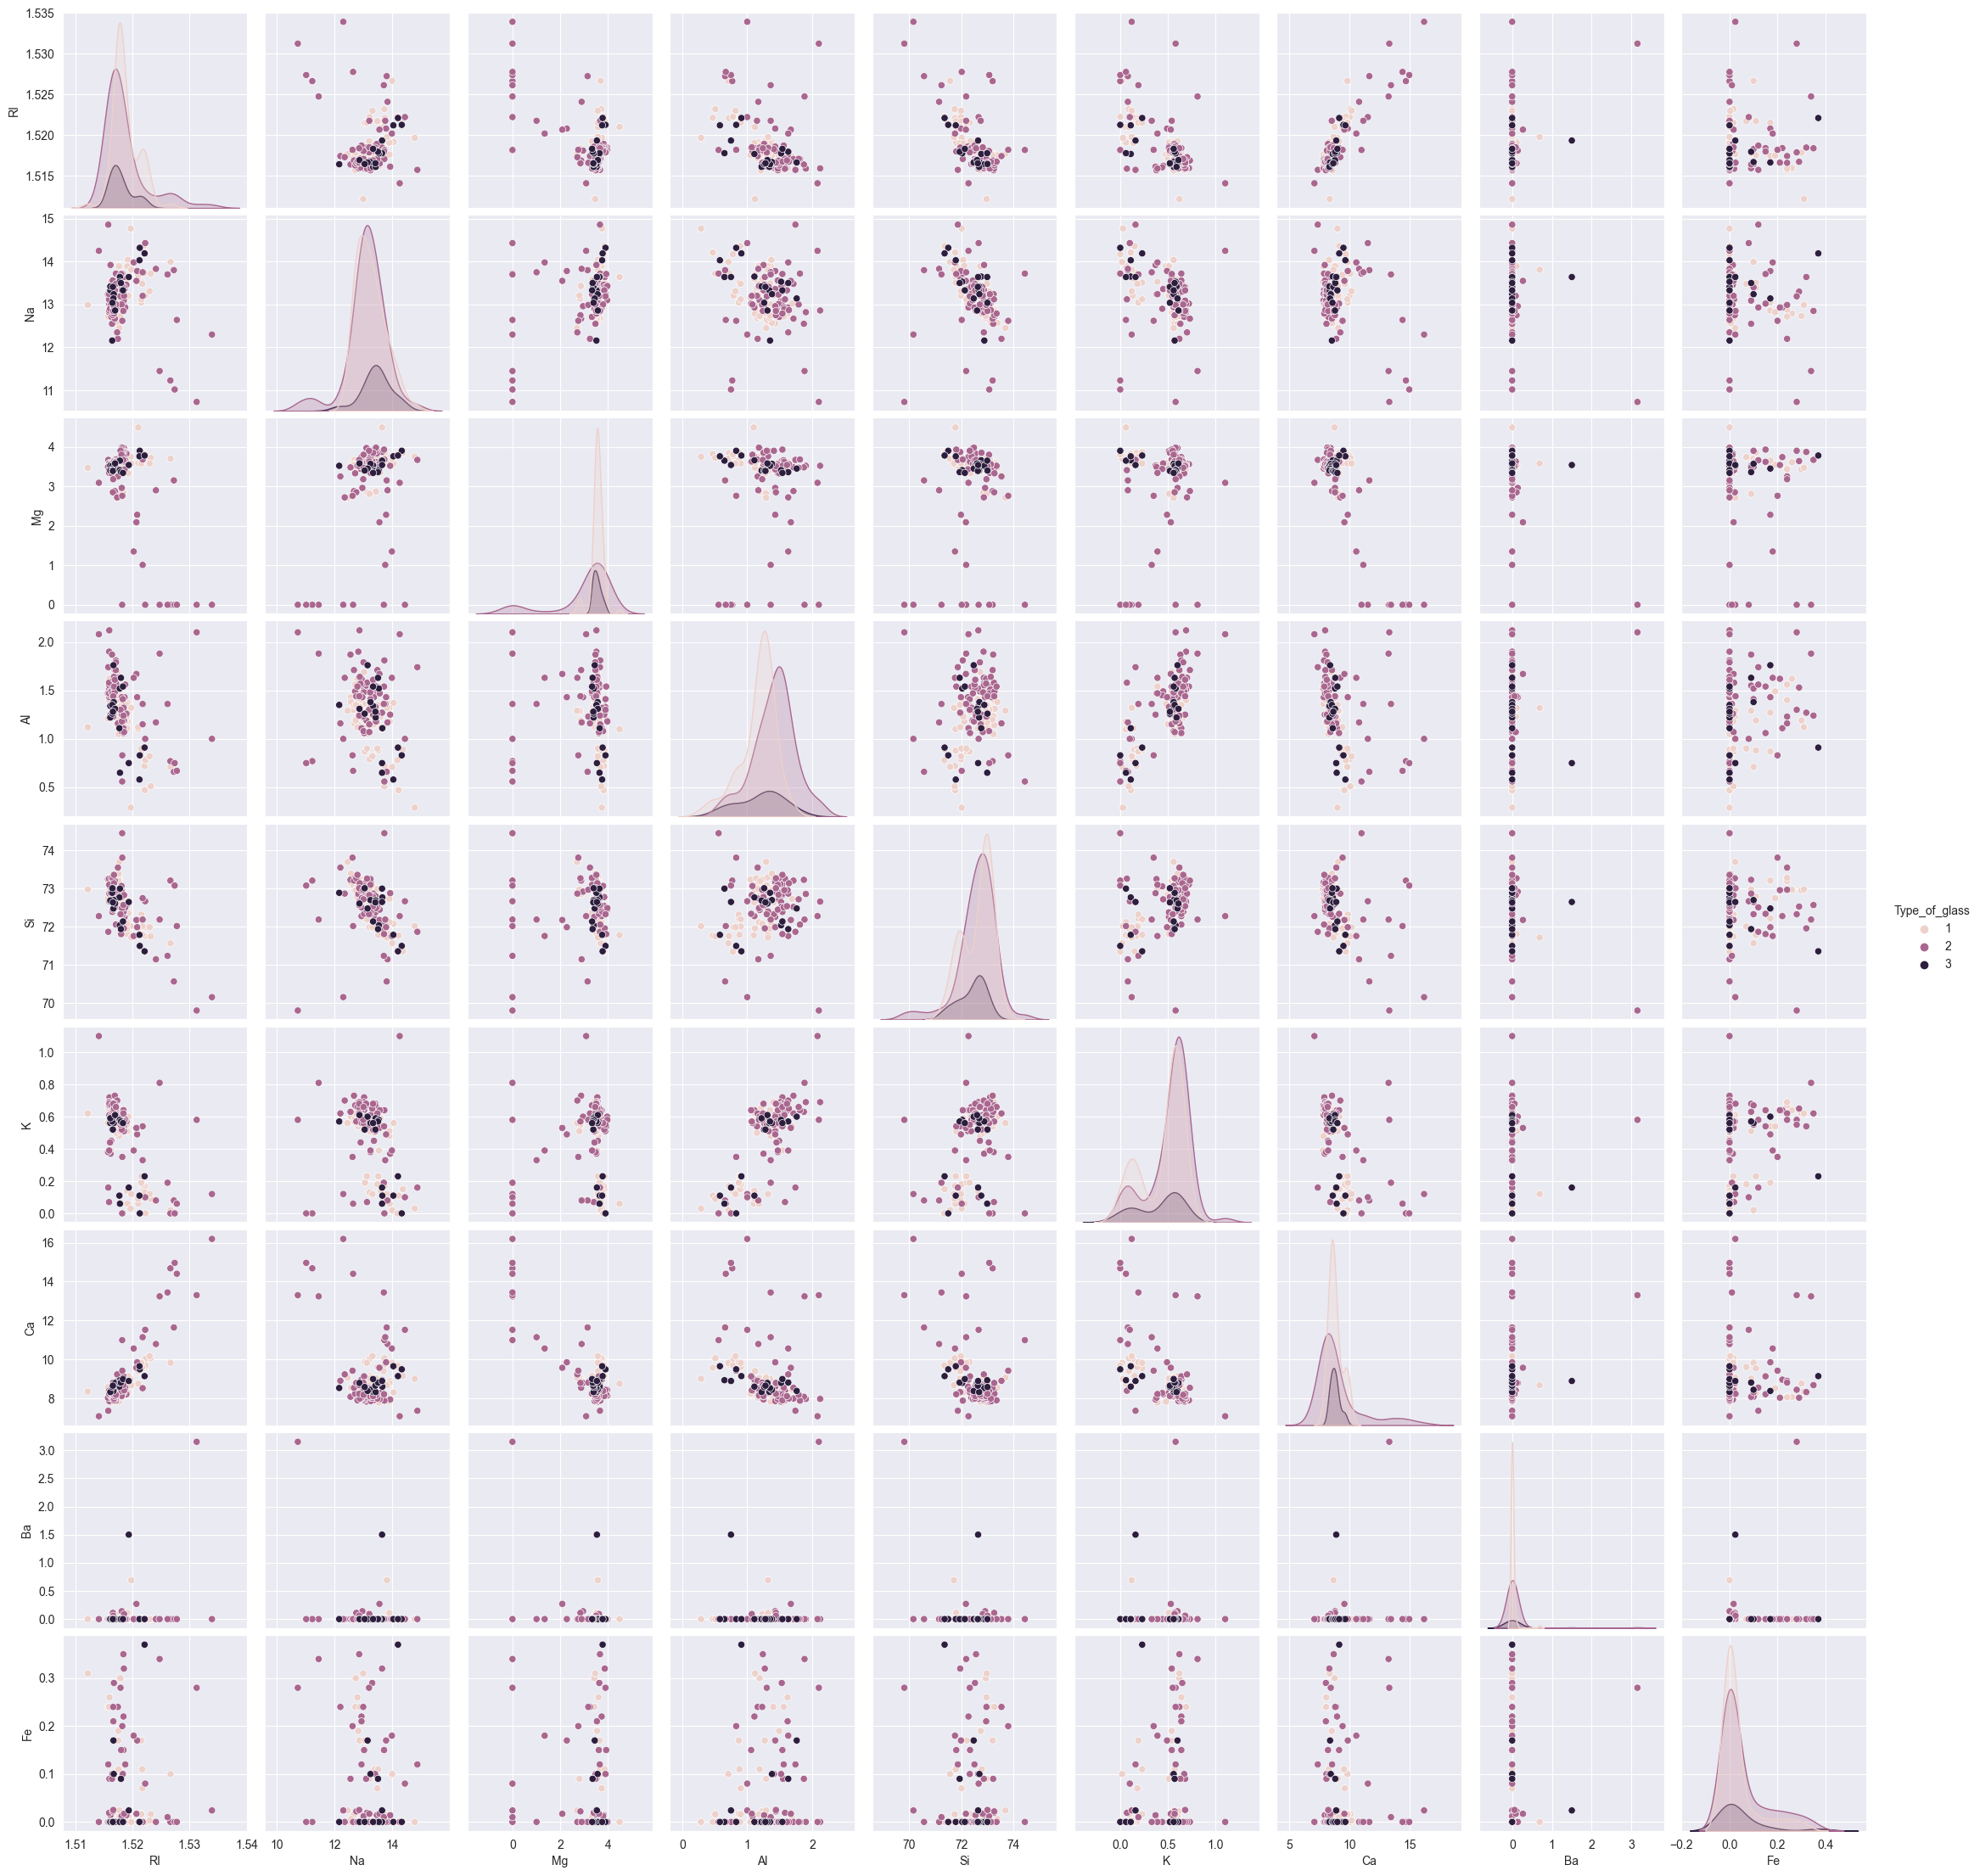

In [191]:
sns.pairplot(df.query("Type_of_glass>=1 and Type_of_glass<=3"), hue='Type_of_glass')

Спробуємо алгоритм SMOTE для маштабування даних

In [154]:
trains_df2 , testi_df = train_test_split(disbalance_df, test_size=0.6,  stratify=disbalance_df['Type_of_glass'])
test_df2, valid_df2 = train_test_split(testi_df, test_size=0.5, stratify=testi_df['Type_of_glass'])

In [157]:
def slice_and_mashtab(df):
    target = df['Type_of_glass']
    df.drop('Type_of_glass', axis=1, inplace=True)
    ros = SMOTE(random_state=0, k_neighbors=1)
    df, target = ros.fit_resample(df, target)
    return df, target

In [158]:
trains_df2, target_train2 = slice_and_mashtab(trains_df2)
test_df2, target_test2 = slice_and_mashtab(test_df2)
valid_df2, target_valid2 = slice_and_mashtab(valid_df2)

In [168]:
msg10, predict_train10, predict_test10 = model(text='маштабованні данні', model=KNeighborsClassifier, train_df=trains_df2, target_train=target_train2, test_df=test_df2, target_test=target_test2, neibor=6)

msg11, predict_train11, predict_test11 = model(text='маштабованні данні', model=KNeighborsRegressor, train_df=trains_df2, target_train=target_train2.values, test_df=test_df2, target_test=target_test2.values, neibor=6)

msg12, predict_train12, predict_test12 = model(text='маштабованні данні', model=NearestCentroid, train_df=trains_df2, target_train=target_train2, test_df=test_df2, target_test=target_test2, metrics='manhattan')

msg13, predict_train13, predict_test13 = model(text='маштабованні данні', model=LogisticRegression, train_df=trains_df2, target_train=target_train2, test_df=test_df2, target_test=target_test2, penalt='l1', solv='liblinear')

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [169]:
print(msg10)

Відпацьовуємо на моделі <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.8388888888888889
precision - 0.8486457714398891
recall - 0.8388888888888889
f1 - 0.8309339310323193

на тестовій виборці маємо такі показники:
accuracy - 0.6811594202898551
precision - 0.7248362011748739
recall - 0.6811594202898551
f1 - 0.6701707320292495


In [170]:
print(msg11)

Відпацьовуємо на моделі <class 'sklearn.neighbors._regression.KNeighborsRegressor'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.7666666666666667
precision - 0.7025776647645604
recall - 0.6571428571428571
f1 - 0.665988038439992

на тестовій виборці маємо такі показники:
accuracy - 0.5072463768115942
precision - 0.5383926373833207
recall - 0.4347826086956522
f1 - 0.45386102942247497


In [164]:
print(msg12)

Відпацьовуємо на моделі <class 'sklearn.neighbors._nearest_centroid.NearestCentroid'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.7277777777777777
precision - 0.7455374029044242
recall - 0.7277777777777777
f1 - 0.7270873182626985

на тестовій виборці маємо такі показники:
accuracy - 0.717391304347826
precision - 0.7280877340948706
recall - 0.717391304347826
f1 - 0.7185211919794097


In [165]:
print(msg13)

Відпацьовуємо на моделі <class 'sklearn.linear_model._logistic.LogisticRegression'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.7277777777777777
precision - 0.7498998639841449
recall - 0.7277777777777777
f1 - 0.7217539765380115

на тестовій виборці маємо такі показники:
accuracy - 0.6376811594202898
precision - 0.6228509676785539
recall - 0.6376811594202899
f1 - 0.6261395747110032


Краще за все відпрацювала модель NearestCentroid подивимось на її прикладах де вона помилялася

In [186]:
tarr, predd = see_unpredict(target_test2, predict_test12)

In [187]:
predd

,predict,True_predict
target,,
1,12,12
2,13,13
3,10,10
6,2,2
7,2,2


In [190]:
tarr.groupby(['target', 'predict']).agg({'True_predict':'count'})

True_predict
target predict              
1      2                   4
       3                   8
2      1                   3
       3                   7
       5                   1
       6                   2
3      1                   3
       2                   7
6      3                   1
       7                   1
7      3                   2

Перевіримо ще роботоу на валідаційних виборках

In [193]:
msg14, predict_train14, predict_test14 = model(text='маштабованні данні', model=KNeighborsClassifier, train_df=trains_df2, target_train=target_train2, test_df=valid_df2, target_test=target_valid2, neibor=6)

msg15, predict_train15, predict_test15 = model(text='маштабованні данні', model=KNeighborsRegressor, train_df=trains_df2, target_train=target_train2.values, test_df=valid_df2, target_test=target_valid2.values, neibor=6)

msg16, predict_train16, predict_test16 = model(text='маштабованні данні', model=NearestCentroid, train_df=trains_df2, target_train=target_train2, test_df=valid_df2, target_test=target_valid2, metrics='manhattan')

msg17, predict_train17, predict_test117 = model(text='маштабованні данні', model=LogisticRegression, train_df=trains_df2, target_train=target_train2, test_df=valid_df2, target_test=target_valid2, penalt='l1', solv='liblinear')

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [194]:
print(msg14)

Відпацьовуємо на моделі <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.8388888888888889
precision - 0.8486457714398891
recall - 0.8388888888888889
f1 - 0.8309339310323193

на тестовій виборці маємо такі показники:
accuracy - 0.7246376811594203
precision - 0.7681003584229392
recall - 0.7246376811594203
f1 - 0.715463994896619


In [195]:
print(msg15)

Відпацьовуємо на моделі <class 'sklearn.neighbors._regression.KNeighborsRegressor'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.7666666666666667
precision - 0.7025776647645604
recall - 0.6571428571428571
f1 - 0.665988038439992

на тестовій виборці маємо такі показники:
accuracy - 0.6594202898550725
precision - 0.6198901098901098
recall - 0.5652173913043478
f1 - 0.5449935434056206


In [196]:
print(msg16)

Відпацьовуємо на моделі <class 'sklearn.neighbors._nearest_centroid.NearestCentroid'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.7277777777777777
precision - 0.7455374029044242
recall - 0.7277777777777777
f1 - 0.7270873182626985

на тестовій виборці маємо такі показники:
accuracy - 0.7028985507246377
precision - 0.7409802043422733
recall - 0.7028985507246377
f1 - 0.7061120203673394


In [197]:
print(msg17)

Відпацьовуємо на моделі <class 'sklearn.linear_model._logistic.LogisticRegression'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.7222222222222222
precision - 0.7457184219037667
recall - 0.7222222222222222
f1 - 0.7162101376608394

на тестовій виборці маємо такі показники:
accuracy - 0.7898550724637681
precision - 0.7853356279253857
recall - 0.7898550724637681
f1 - 0.7838505093939876


суто по валідаційній виборці краще за все впоралась моедль LogisticRegression, але NearestCentroid теж показала стабільний скор. Для данного типу данних, я би обрав саме NearestCentroid для покращення і вдосконалення її саме під ці данні. Маштабування данних дало нам прирост f1 score на +- 20 відсотків.

<---------- Друга частина домашнього завдання ---------->

In [252]:
columns = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type','veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [253]:
df_encoder = pd.read_csv('C:/Users/lemes/OneDrive/Рабочий стол/dz/agaricus-lepiota.data', names=columns)
df_encoder

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [268]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

In [260]:
df_encoder.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   poisonous                 8124 non-null   bool 
 1   cap-shape                 8124 non-null   bool 
 2   cap-surface               8124 non-null   bool 
 3   cap-color                 8124 non-null   bool 
 4   bruises                   8124 non-null   bool 
 5   odor                      8124 non-null   bool 
 6   gill-attachment           8124 non-null   bool 
 7   gill-spacing              8124 non-null   bool 
 8   gill-size                 8124 non-null   bool 
 9   gill-color                8124 non-null   bool 
 10  stalk-shape               8124 non-null   bool 
 11  stalk-root                8124 non-null   bool 
 12  stalk-surface-above-ring  8124 non-null   bool 
 13  stalk-surface-below-ring  8124 non-null   bool 
 14  stalk-color-above-ring    8124 non-null 

In [265]:
# оскільки наш таргет є також фічеє категорійною будемо до нього застосовувати лейбл енкодер
fica = LabelEncoder().fit(df_encoder['poisonous'])

In [266]:
fica.transform(df_encoder['poisonous'])

array([1, 0, 0, ..., 0, 1, 0])

In [267]:
df_encoder['poisonous'] = fica.transform(df_encoder['poisonous'])

In [ ]:
#взагалі мені подобається підхід з target encoderom спробужмо його

In [272]:
# зробимо копію
df_target = df_encoder.copy()

In [271]:
columns = df_encoder.columns
columns = columns[1:]

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [275]:
def make_target_encode(column):
    TE_encoder = TargetEncoder()
    df_target[f'{column}'] = TE_encoder.fit_transform(df_target[[f'{column}']], df_target['poisonous'])

In [276]:
for i in range(0,len(columns)):
    make_target_encode(columns[i])

In [278]:
sns.pairplot(df_target, hue='poisonous')

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Error in callback <function flush_figures at 0x00000176E1688680> (for post_execute):



KeyboardInterrupt



In [279]:
trains_dfencode , testi_df = train_test_split(df_target, test_size=0.6,  stratify=df_target['poisonous'])
test_dfencode, valid_dfencode = train_test_split(testi_df, test_size=0.5, stratify=testi_df['poisonous'])

In [280]:
def slice(df):
    target = df['poisonous']
    df.drop('poisonous', axis=1, inplace=True)
    return df, target

In [281]:
trains_dfencode, target_trainencode = slice(trains_dfencode)
test_dfencode, target_testencode = slice(test_dfencode)
valid_dfencode, target_validencode = slice(valid_dfencode)

In [286]:
#msg20, predict_train20, predict_test20 = model(text='маштабованні данні', model=KNeighborsClassifier, train_df=trains_dfencode, target_train=target_trainencode, test_df=test_dfencode, target_test=target_testencode, neibor=6)

msg21, predict_train21, predict_test21 = model(text='маштабованні данні', model=KNeighborsRegressor, train_df=trains_dfencode, target_train=target_trainencode.values, test_df=test_dfencode, target_test=target_testencode.values, neibor=6)

msg22, predict_train22, predict_test22 = model(text='маштабованні данні', model=NearestCentroid, train_df=trains_dfencode, target_train=target_trainencode, test_df=test_dfencode, target_test=target_testencode, metrics='manhattan')

msg23, predict_train23, predict_test23 = model(text='маштабованні данні', model=LogisticRegression, train_df=trains_dfencode, target_train=target_trainencode, test_df=test_dfencode, target_test=target_testencode, penalt='l1', solv='liblinear')

In [287]:
print(msg21)

Відпацьовуємо на моделі <class 'sklearn.neighbors._regression.KNeighborsRegressor'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.9990766389658357
precision - 0.9991103202846975
recall - 0.9990421455938697
f1 - 0.9990753776395065

на тестовій виборці маємо такі показники:
accuracy - 0.9971276159212146
precision - 0.9972419227738376
recall - 0.9970212765957447
f1 - 0.9971233360196138


In [288]:
print(msg22)

Відпацьовуємо на моделі <class 'sklearn.neighbors._nearest_centroid.NearestCentroid'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.9008925823330255
precision - 0.9197007481296758
recall - 0.8971902937420179
f1 - 0.8990495287206367

на тестовій виборці маємо такі показники:
accuracy - 0.8916700861715223
precision - 0.9134993446920052
recall - 0.8876595744680851
f1 - 0.8893752295483589


In [289]:
print(msg23)

Відпацьовуємо на моделі <class 'sklearn.linear_model._logistic.LogisticRegression'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.9990766389658357
precision - 0.9991103202846975
recall - 0.9990421455938697
f1 - 0.9990753776395065

на тестовій виборці маємо такі показники:
accuracy - 0.9971276159212146
precision - 0.9972419227738376
recall - 0.9970212765957447
f1 - 0.9971233360196138


In [ ]:
# Бачяимо що моделі наші відпрацювали дуже добре (окремо модель KNeighborsClassifier видає помилки)

Спробуємо ще OneHotEncoder

In [346]:
one_hot_df = df_encoder.copy()

In [347]:
one_hot_df

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [348]:
one_hot_df, target = slice(one_hot_df)

In [349]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder = encoder.fit(one_hot_df)
cap = encoder.transform(one_hot_df).toarray()

In [350]:
cap

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [351]:
encoder.categories_

[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object),
 array(['f', 'g', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object),
 array(['a', 'f'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['?', 'b', 'c', 'e', 'r'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['p'], dtype=object),
 array(['n', 'o', 'w', 'y'], dtype=object),
 array(['n', 'o', 't'], dtype=object),
 array(['e', 'f', 'l', 'n', 'p'], dtype=object),
 array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=ob

In [352]:
columns = df_encoder.columns
columns = columns[1:]
new_columns = []
for i in range(0,len(encoder.categories_)):
    for j in range(0,len(encoder.categories_[i])):
        new_columns.append(f'{columns[i]} - {encoder.categories_[i][j]}')
    

In [353]:
one_hot_df = pd.DataFrame(cap, columns=new_columns)

In [356]:
one_hot_df

,cap-shape - b,cap-shape - c,cap-shape - f,cap-shape - k,cap-shape - s,cap-shape - x,cap-surface - f,cap-surface - g,cap-surface - s,cap-surface - y,...,population - v,population - y,habitat - d,habitat - g,habitat - l,habitat - m,habitat - p,habitat - u,habitat - w,poisonous
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [ ]:
#подивимось як тут відпрацюють данні

In [355]:
one_hot_df['poisonous'] = target

In [358]:
train , testi_df = train_test_split(one_hot_df, test_size=0.6,  stratify=one_hot_df['poisonous'])
test, valid = train_test_split(testi_df, test_size=0.5, stratify=testi_df['poisonous'])

In [359]:
train_df, target_train = slice(train)
test_df, target_test = slice(test)
valid_df, valid_target = slice(valid)

In [361]:
#msg40, predict_train40, predict_test40 = model(text='маштабованні данні', model=KNeighborsClassifier, train_df=train_df, target_train=target_train, test_df=test_df, target_test=target_test, neibor=6)

msg41, predict_train41, predict_test41 = model(text='маштабованні данні', model=KNeighborsRegressor, train_df=train_df, target_train=target_train.values, test_df=test_df, target_test=target_test.values, neibor=6)

msg42, predict_train42, predict_test42 = model(text='маштабованні данні', model=NearestCentroid, train_df=train_df, target_train=target_train, test_df=test_df, target_test=target_test, metrics='manhattan')

msg43, predict_train43, predict_test43 = model(text='маштабованні данні', model=LogisticRegression, train_df=train_df, target_train=target_train, test_df=test_df, target_test=target_test, penalt='l1', solv='liblinear')

In [362]:
print(msg41)

Відпацьовуємо на моделі <class 'sklearn.neighbors._regression.KNeighborsRegressor'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.9996922129886119
precision - 0.9997030878859858
recall - 0.9996807151979565
f1 - 0.9996918064628062

на тестовій виборці маємо такі показники:
accuracy - 0.9979482970865818
precision - 0.9980268350434096
recall - 0.9978723404255319
f1 - 0.9979453689019737


In [363]:
print(msg42)

Відпацьовуємо на моделі <class 'sklearn.neighbors._nearest_centroid.NearestCentroid'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.8821175746383503
precision - 0.9031993153428748
recall - 0.8780690611319415
f1 - 0.8796198346963527

на тестовій виборці маємо такі показники:
accuracy - 0.8871563397620025
precision - 0.9065930764542793
recall - 0.8833307482213306
f1 - 0.8849430659816558


In [364]:
print(msg43)

Відпацьовуємо на моделі <class 'sklearn.linear_model._logistic.LogisticRegression'>, з даними маштабованні данні

на навчальній виборці маємо такі показники:
accuracy - 0.9993844259772238
precision - 0.9994065281899109
recall - 0.9993614303959131
f1 - 0.9993835990680944

на тестовій виборці маємо такі показники:
accuracy - 0.9975379565038982
precision - 0.9976340694006309
recall - 0.9974468085106383
f1 - 0.9975343657677832


In [ ]:
# відчутної різниці я не знайшов, але TargetEncoder мені сподобався більше